# BMET5933 Assignment 1 Demo Code

### Package Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
import skimage.measure
from skimage.feature import greycomatrix, greycoprops
from skimage.exposure import equalize_hist
from skimage.segmentation import *
from skimage.morphology import *

from sklearn.cluster import KMeans

## 1. Histograms

### Image Loading and Display

#### Benign Image

In [2]:
ben_img = plt.imread('assign_demo_sample/ISIC_0000126-b.jpg')
ben_mask = plt.imread('assign_demo_sample/ISIC_0000126_Segmentation-b.png')
print('The size of the image is')
print(ben_img.shape)
print('The size of the mask is')
print(ben_mask.shape)

The size of the image is
(1536, 2048, 3)
The size of the mask is
(1536, 2048)


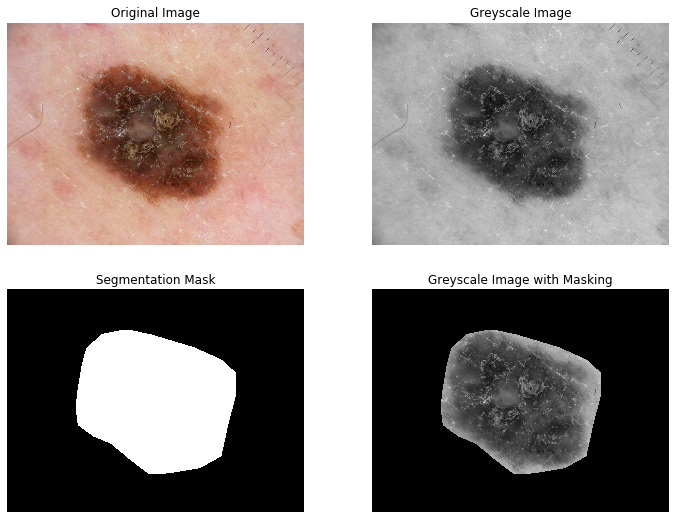

In [3]:
ben_img_grey = rgb2gray(ben_img)
ben_img_grey_msked = ben_mask*ben_img_grey

plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(ben_img)
plt.axis('off')
plt.subplot(2,2,2) 
plt.title('Greyscale Image')
plt.imshow(ben_img_grey, cmap='gray')
plt.axis('off')
plt.subplot(2,2,3) 
plt.title('Segmentation Mask')
plt.imshow(ben_mask, cmap='gray')
plt.axis('off')
plt.subplot(2,2,4) 
plt.title('Greyscale Image with Masking')
plt.imshow(ben_img_grey_msked, cmap='gray')
plt.axis('off')
plt.show()

#### Malignant Image

In [4]:
mal_img = plt.imread('assign_demo_sample/ISIC_0010863-m.jpg')
mal_mask = plt.imread('assign_demo_sample/ISIC_0010863_Segmentation-m.png')
print('The size of the image is')
print(mal_img.shape)
print('The size of the mask is')
print(mal_mask.shape)

The size of the image is
(768, 1024, 3)
The size of the mask is
(768, 1024)


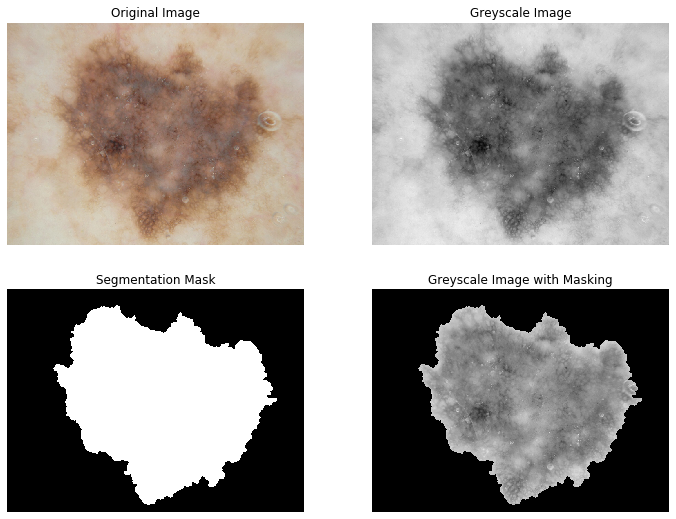

In [5]:
mal_img_grey = rgb2gray(mal_img)
mal_img_grey_msked = mal_mask*mal_img_grey

plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(mal_img)
plt.axis('off')
plt.subplot(2,2,2) 
plt.title('Greyscale Image')
plt.imshow(mal_img_grey, cmap='gray')
plt.axis('off')
plt.subplot(2,2,3) 
plt.title('Segmentation Mask')
plt.imshow(mal_mask, cmap='gray')
plt.axis('off')
plt.subplot(2,2,4) 
plt.title('Greyscale Image with Masking')
plt.imshow(mal_img_grey_msked, cmap='gray')
plt.axis('off')
plt.show()

### Compute Histogram of Image with Masking

#### Benign Image

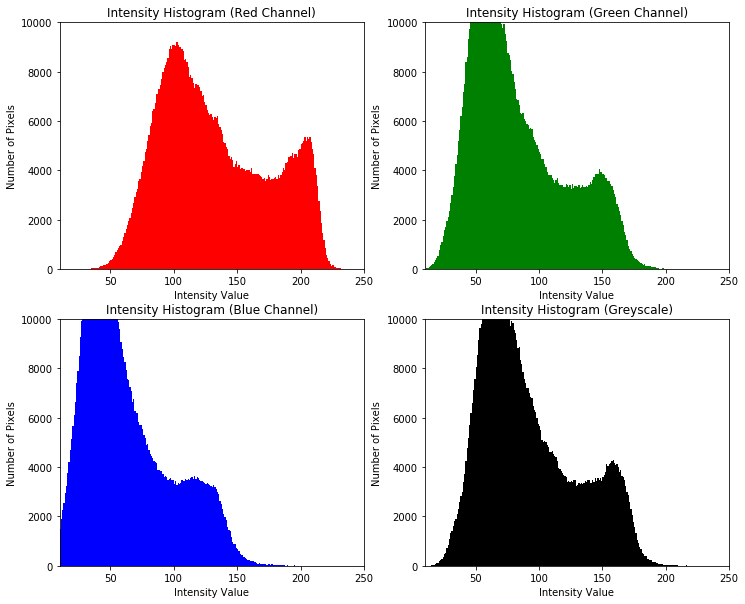

In [6]:
ben_red_map_msked = (ben_mask*ben_img[:,:,0]).flatten()
ben_green_map_msked = (ben_mask*ben_img[:,:,1]).flatten()
ben_blue_map_msked = (ben_mask*ben_img[:,:,2]).flatten()
ben_grey_map_msked = (255*ben_mask*ben_img_grey).flatten().astype(int)

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Intensity Histogram (Red Channel)')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.axis([10, 250, 0, 10000])
plt.hist(
    ben_red_map_msked,
    color='red',
    bins=range(256))
plt.subplot(2,2,2)
plt.title('Intensity Histogram (Green Channel)')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.axis([10, 250, 0, 10000])
plt.hist(
    ben_green_map_msked,
    color='green',
    bins=range(256))
plt.subplot(2,2,3)
plt.title('Intensity Histogram (Blue Channel)')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.axis([10, 250, 0, 10000])
plt.hist(
    ben_blue_map_msked,
    color='blue',
    bins=range(256))
plt.subplot(2,2,4)
plt.title('Intensity Histogram (Greyscale)')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.axis([10, 250, 0, 10000])
plt.hist(
    ben_grey_map_msked,
    color='black',
    bins=range(256))
plt.show()

#### Malignant Image

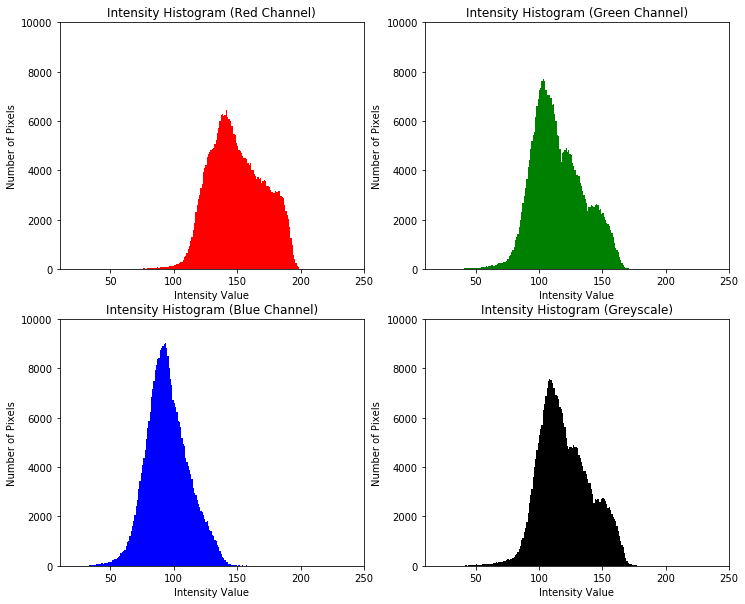

In [7]:
mal_red_map_msked = (mal_mask*mal_img[:,:,0]).flatten()
mal_green_map_msked = (mal_mask*mal_img[:,:,1]).flatten()
mal_blue_map_msked = (mal_mask*mal_img[:,:,2]).flatten()
mal_grey_map_msked = (255*mal_mask*mal_img_grey).flatten().astype(int)

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Intensity Histogram (Red Channel)')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.axis([10, 250, 0, 10000])
plt.hist(
    mal_red_map_msked,
    color='red',
    bins=range(256))
plt.subplot(2,2,2)
plt.title('Intensity Histogram (Green Channel)')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.axis([10, 250, 0, 10000])
plt.hist(
    mal_green_map_msked,
    color='green',
    bins=range(256))
plt.subplot(2,2,3)
plt.title('Intensity Histogram (Blue Channel)')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.axis([10, 250, 0, 10000])
plt.hist(
    mal_blue_map_msked,
    color='blue',
    bins=range(256))
plt.subplot(2,2,4)
plt.title('Intensity Histogram (Greyscale)')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.axis([10, 250, 0, 10000])
plt.hist(
    mal_grey_map_msked,
    color='black',
    bins=range(256))
plt.show()

## 2. Features

### Energy

In [8]:
b_energy = np.sum(np.square(ben_img_grey_msked))
print('The energy of the benign image is')
print(b_energy)

m_energy = np.sum(np.square(mal_img_grey_msked))
print('The energy of the malignant image is')
print(m_energy)

The energy of the benign image is
128576.25264391095
The energy of the malignant image is
75777.02429295926


### Entropy

In [9]:
b_entropy = skimage.measure.shannon_entropy(ben_img_grey_msked)
print('The entropy of the benign image is')
print(b_entropy)

m_entropy = skimage.measure.shannon_entropy(mal_img_grey_msked)
print('The entropy of the malignant image is')
print(m_entropy)

The entropy of the benign image is
4.893841922870821
The entropy of the malignant image is
6.330904535936642


### GLCM Features

In [10]:
def compute_GLCM(img, levels, feature):
    LEVELS = levels

    FACTOR = np.max(img) / (LEVELS-1)
    BINNED_IMAGE = img // FACTOR

    INTEGER_IMAGE = BINNED_IMAGE.astype(int)

    glcmat = greycomatrix(INTEGER_IMAGE,
        distances=[1],
        angles=[0],
        levels=LEVELS)

    glcm_FEATURE = greycoprops(glcmat, feature)
    return glcm_FEATURE

In [11]:
# Compute GLCM contrast, homogeneity, and correlation with the intensity level of 3

print('The GLCM feature of the benign image is: ')
print('Contrast: ')
print(compute_GLCM(ben_img_grey_msked, 3, 'contrast').item())
print('Homogeneity: ')
print(compute_GLCM(ben_img_grey_msked, 3, 'homogeneity').item())
print('Correlation: ')
print(compute_GLCM(ben_img_grey_msked, 3, 'homogeneity').item())

print('The GLCM feature of the malignant image is: ')
print('Contrast: ')
print(compute_GLCM(mal_img_grey_msked, 3, 'contrast').item())
print('Homogeneity: ')
print(compute_GLCM(mal_img_grey_msked, 3, 'homogeneity').item())
print('Correlation: ')
print(compute_GLCM(mal_img_grey_msked, 3, 'homogeneity').item())

The GLCM feature of the benign image is: 
Contrast: 
0.004951351571405308
Homogeneity: 
0.9975243242142974
Correlation: 
0.9975243242142974
The GLCM feature of the malignant image is: 
Contrast: 
0.022187601824698602
Homogeneity: 
0.9889061990876507
Correlation: 
0.9889061990876507


## 3. Segmentation

### Histogram Equalisation

C:\Users\qjy\anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


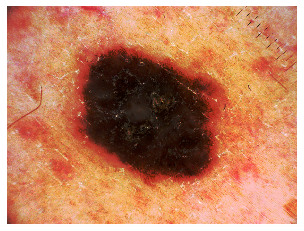

In [12]:
# Perform histogram equalisation to enhance contrast

ben_img_equalized = equalize_hist(ben_img)
plt.imshow(ben_img_equalized)
plt.axis('off')
plt.show()

### K-Means Clustering Algorithm

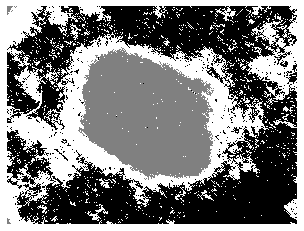

In [13]:
# Use K-Means Clustering algorithm to divide the image into K classes

kmeans = KMeans(n_clusters=3, random_state=0).fit(np.reshape(ben_img_equalized, (ben_img_equalized.shape[0]*ben_img_equalized.shape[1], 3)))
ben_kmeans_seg = np.reshape(kmeans.labels_, (ben_img_equalized.shape[0], ben_img_equalized.shape[1]))
plt.imshow(ben_kmeans_seg, cmap='gray')
plt.axis('off')
plt.show()

### Region Growing

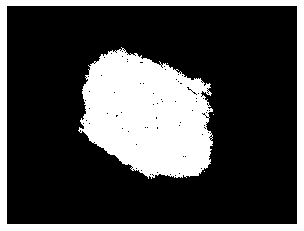

In [14]:
# Apply region growing to select the ROI classfied by K-Means and remove pixels outside the ROI

ben_flood_seg = flood(ben_kmeans_seg.astype(float), seed_point=(700,1000), tolerance=0.5)
plt.imshow(ben_flood_seg, cmap='gray')
plt.axis('off')
plt.show()

### Closing Operation

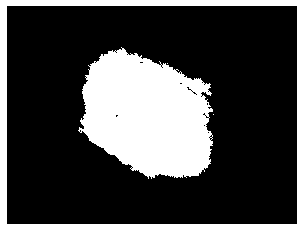

In [15]:
# Apply morphological closing operation to add negative pixels inside the ROI

ben_output_seg = area_closing(ben_flood_seg, connectivity=2)
plt.imshow(ben_output_seg, cmap='gray')
plt.axis('off')
plt.show()

### Overall Display

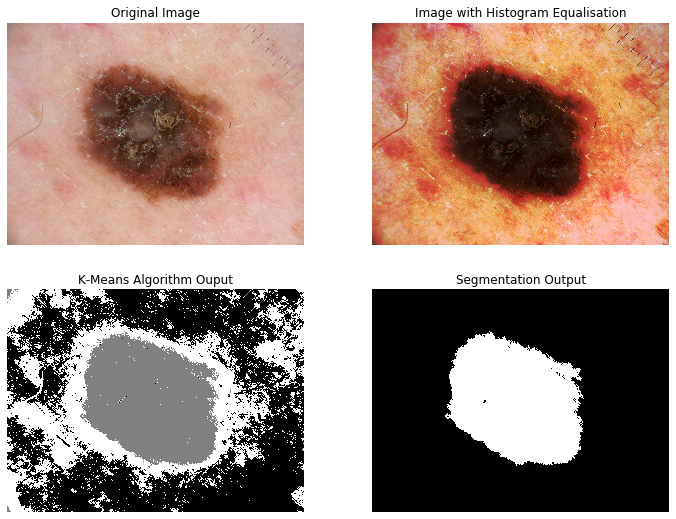

In [16]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(ben_img)
plt.axis('off')
plt.subplot(2,2,2) 
plt.title('Image with Histogram Equalisation')
plt.imshow(ben_img_equalized)
plt.axis('off')
plt.subplot(2,2,3) 
plt.title('K-Means Algorithm Ouput')
plt.imshow(ben_kmeans_seg, cmap='gray')
plt.axis('off')
plt.subplot(2,2,4) 
plt.title('Segmentation Output')
plt.imshow(ben_output_seg, cmap='gray')
plt.axis('off')
plt.show()

### Segmentation Metrics Evaluation

In [17]:
TP = np.sum(np.logical_and(ben_output_seg == 1, ben_mask == 1))
TN = np.sum(np.logical_and(ben_output_seg == 0, ben_mask == 0))
FP = np.sum(np.logical_and(ben_output_seg == 1, ben_mask == 0))
FN = np.sum(np.logical_and(ben_output_seg == 0, ben_mask == 1))

precision = TP/(TP+FP)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
IoU_score = TP/(FP+FN+TP)

print('Precision: ', precision)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('IoU Score: ', IoU_score)

Precision:  1.0
Sensitivity:  0.7565858523496307
Specificity:  1.0
IoU Score:  0.7565858523496307


### Repeat for another image

C:\Users\qjy\anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


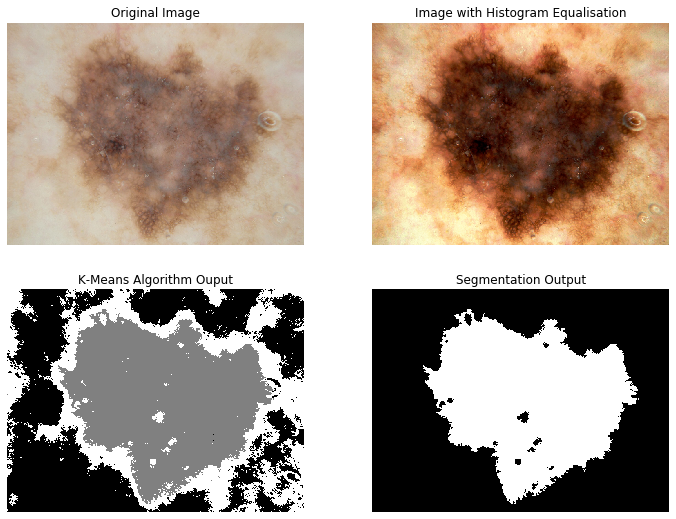

In [18]:
mal_img_equalized = equalize_hist(mal_img)
kmeans = KMeans(n_clusters=3, random_state=0).fit(np.reshape(mal_img_equalized, (mal_img_equalized.shape[0]*mal_img_equalized.shape[1], 3)))
mal_kmeans_seg = np.reshape(kmeans.labels_, (mal_img_equalized.shape[0], mal_img_equalized.shape[1]))
mal_flood_seg = flood(mal_kmeans_seg.astype(float), seed_point=(400,400), tolerance=0.5)
mal_output_seg = area_closing(mal_flood_seg, connectivity=2)

plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(mal_img)
plt.axis('off')
plt.subplot(2,2,2) 
plt.title('Image with Histogram Equalisation')
plt.imshow(mal_img_equalized)
plt.axis('off')
plt.subplot(2,2,3) 
plt.title('K-Means Algorithm Ouput')
plt.imshow(mal_kmeans_seg, cmap='gray')
plt.axis('off')
plt.subplot(2,2,4) 
plt.title('Segmentation Output')
plt.imshow(mal_output_seg, cmap='gray')
plt.axis('off')
plt.show()

In [19]:
TP = np.sum(np.logical_and(mal_output_seg == 1, mal_mask == 1))
TN = np.sum(np.logical_and(mal_output_seg == 0, mal_mask == 0))
FP = np.sum(np.logical_and(mal_output_seg == 1, mal_mask == 0))
FN = np.sum(np.logical_and(mal_output_seg == 0, mal_mask == 1))

precision = TP/(TP+FP)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
IoU_score = TP/(FP+FN+TP)

print('Precision: ', precision)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('IoU Score: ', IoU_score)

Precision:  0.9998499525431299
Sensitivity:  0.867020697167756
Specificity:  0.9999056918272099
IoU Score:  0.866907900509193
